In [17]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns





In [18]:
air_poll = pd.read_csv('pollution dataset.csv')

In [19]:
air_poll.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [20]:
air_poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [21]:
air_poll.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [22]:
air_poll['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [23]:
air_poll.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


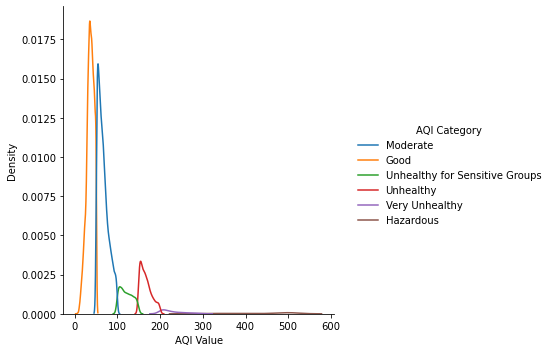

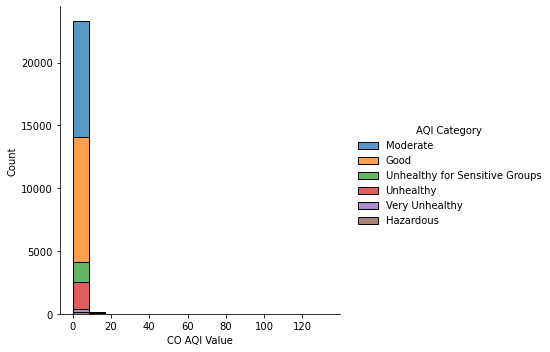

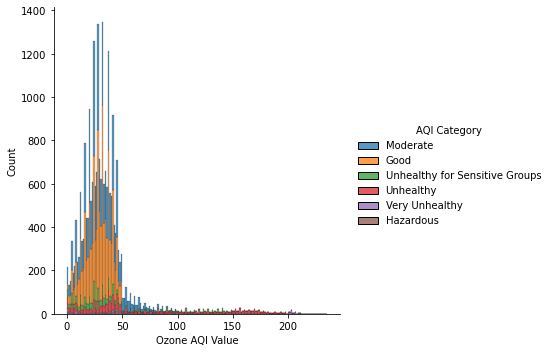

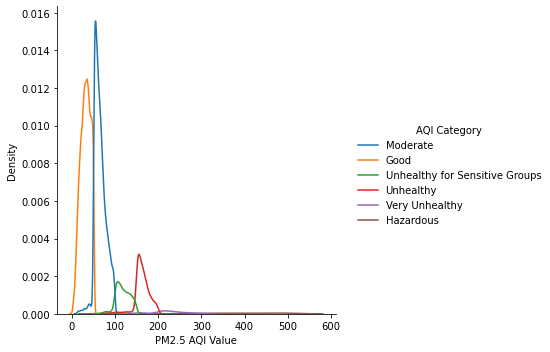

In [41]:
sns.displot(data=air_poll,x='AQI Value', hue='AQI Category',kind='kde')

sns.displot(data=air_poll,x='CO AQI Value',hue='AQI Category',multiple='stack')

sns.displot(data=air_poll,x='Ozone AQI Value',hue='AQI Category',multiple='stack')

sns.displot(data=air_poll,x='PM2.5 AQI Value',hue='AQI Category',kind='kde')

Text(0.5, 1.0, 'Most Country have worst overall AQI value')

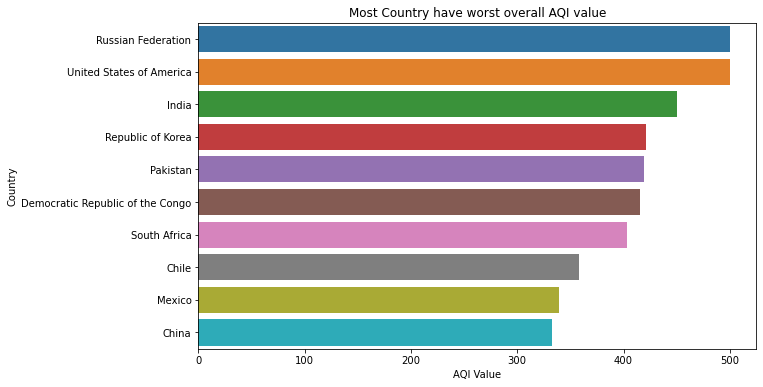

In [33]:
aql_overall = air_poll[['Country','City','AQI Value','AQI Category']]
aql_overall_haz = aql_overall[aql_overall['AQI Category'] == 'Hazardous']
hazardous = aql_overall_haz.groupby('Country',as_index=False)['AQI Value'].mean().sort_values(by='AQI Value',ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='AQI Value', y='Country',data=hazardous)
plt.title('Most Country have worst overall AQI value')

Text(0.5, 1.0, 'Most Country have good overall AQI value')

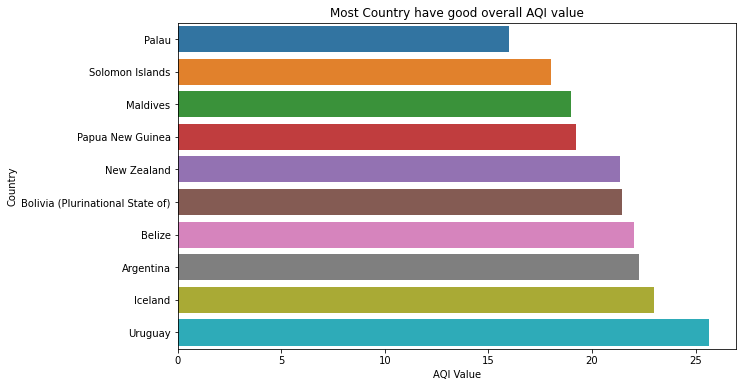

In [26]:
aql_overall_good = aql_overall[aql_overall['AQI Category'] == 'Good']
good = aql_overall_good.groupby('Country',as_index=False)['AQI Value'].mean().sort_values(by='AQI Value').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='AQI Value', y='Country',data=good)
plt.title('Most Country have good overall AQI value')

<AxesSubplot:>

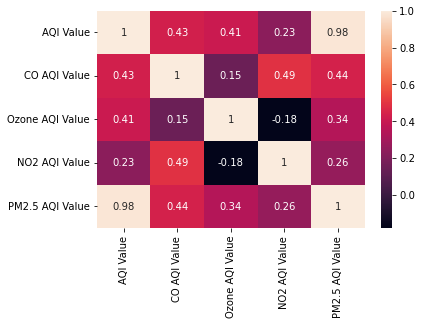

In [27]:
sns.heatmap(air_poll.corr(),annot=True)

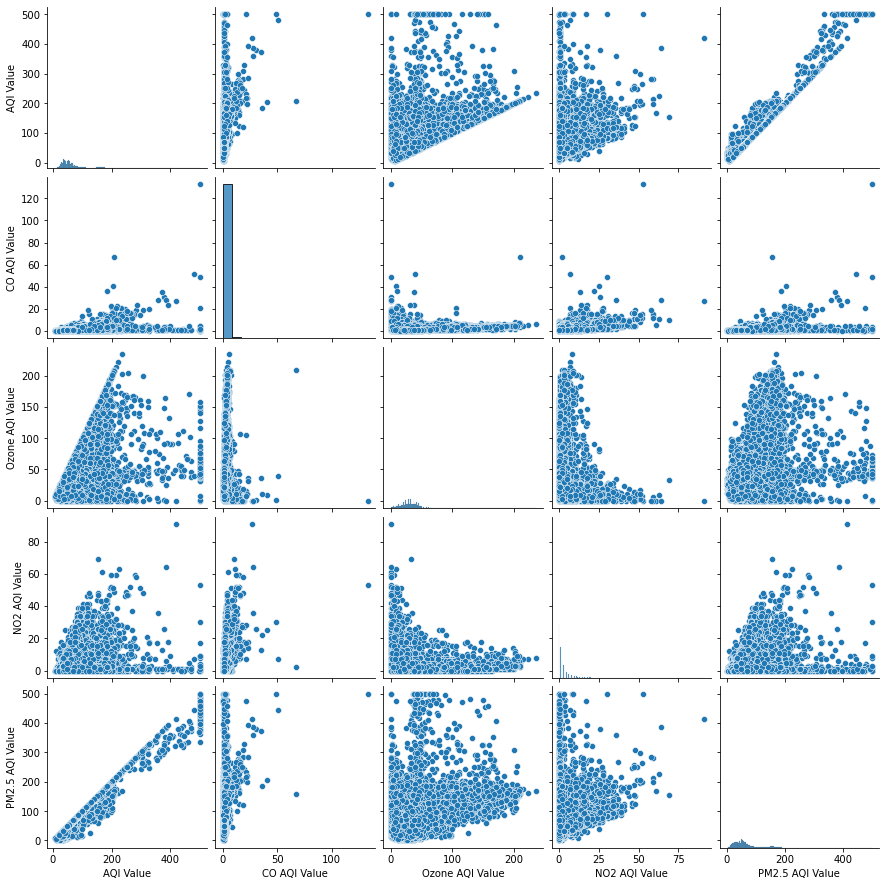

In [28]:
sns.pairplot(air_poll)

<AxesSubplot:xlabel='AQI Value', ylabel='PM2.5 AQI Value'>

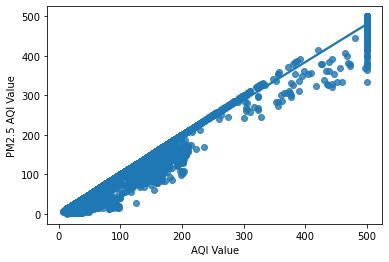

In [29]:
sns.regplot(x='AQI Value',y='PM2.5 AQI Value',data=air_poll)